

# Project: - tmdb-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analysing the dataset tmdb-movies.csv, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis

In this project we would be finding insights about which year generated the highest average revenue in movie production From the year 2000 to the year 2015 for both comedy and drama? Also,  we would find the genre with the highest budget in the year 2010 between the genres comedy and drama.

## Importing of packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv') #reading the csv file into a pandas dataframe and printing ou the first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape #the shape of the dataframe in row and column respectively

(10866, 21)

In [5]:
mask_1 = df["release_year"] >= 2000 #Obtaining the release_year of 2000 and above 
df = df[mask_1]                     #using the indexing and selecting data method
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.describe() #some descriptive statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7168.000000,7168.000000,7.168000e+03,7.168000e+03,7168.000000,7168.000000,7168.000000,7168.000000,7.168000e+03,7.168000e+03
mean,91429.628906,0.693524,1.685180e+07,4.337358e+07,99.737723,255.880441,5.911928,2009.018136,1.767841e+07,4.501970e+07
std,103916.733504,1.129084,3.509609e+07,1.301125e+08,33.352364,644.003676,0.971301,4.341236,3.632479e+07,1.326838e+08
min,12.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,2000.000000,0.000000e+00,0.000000e+00
25%,13221.500000,0.204303,0.000000e+00,0.000000e+00,89.000000,17.000000,5.300000,2006.000000,0.000000e+00,0.000000e+00
50%,40967.000000,0.390768,0.000000e+00,0.000000e+00,97.000000,43.000000,6.000000,2010.000000,0.000000e+00,0.000000e+00
75%,150577.250000,0.767455,1.800000e+07,2.179013e+07,109.000000,181.000000,6.600000,2013.000000,1.894612e+07,2.319898e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


    The important variables in the dataset which are budget and revenue includes 0.0 values until the 50% percentile this means half of the data in these columns are 0.0. this might be as a result of missing data and 0.0 was used to input it.
    idealy if a column contains more than 50% of missing data the column should be drop, since its just at 50% the columns would be left but the analysis would not generalised the whole data set and this would be a limitation

In [7]:
df.info() #information about the columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 21 columns):
id                      7168 non-null int64
imdb_id                 7158 non-null object
popularity              7168 non-null float64
budget                  7168 non-null int64
revenue                 7168 non-null int64
original_title          7168 non-null object
cast                    7105 non-null object
homepage                2730 non-null object
director                7129 non-null object
tagline                 4986 non-null object
keywords                5904 non-null object
overview                7164 non-null object
runtime                 7168 non-null int64
genres                  7150 non-null object
production_companies    6319 non-null object
release_date            7168 non-null object
vote_count              7168 non-null int64
vote_average            7168 non-null float64
release_year            7168 non-null int64
budget_adj              7168 non-null floa


### Data Cleaning

In [8]:
unwanted_col = ["id", "imdb_id", "popularity", "cast", "homepage", "keywords", "overview", "runtime", 
                "production_companies",
                "tagline",
                "director", "release_date", "vote_count", "vote_average", "budget_adj", "revenue_adj"]
df.drop(columns=unwanted_col, inplace = True) #droping unwanted columns using the drop_column-method

this columns where droped because they will not be useful in our analysis

In [9]:
df.isnull().sum() # checking for missing values usin the isnull function

budget             0
revenue            0
original_title     0
genres            18
release_year       0
dtype: int64

This is done to obtain the amount of missing data, but the missing data was relatively small and would be dropped

In [10]:
df.dropna(inplace = True) #dropping the rows with missing data using the dropna-method

In [11]:
#information about the columns of the new dataframe after dropping the null values
#Now we have no missing data after using the dropna-method
df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7150 entries, 0 to 8887
Data columns (total 5 columns):
budget            7150 non-null int64
revenue           7150 non-null int64
original_title    7150 non-null object
genres            7150 non-null object
release_year      7150 non-null int64
dtypes: int64(3), object(2)
memory usage: 335.2+ KB


In [12]:
df.head() #displaying the firsr five rows of the dataframe

,budget,revenue,original_title,genres,release_year
0,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015
4,190000000,1506249360,Furious 7,Action|Crime|Thriller,2015


In [13]:
genre = df["genres"].value_counts() #the list of the genres and their counts 
                                    #using the data selection and value_counts() method                                                                        
                                
genre                               

Drama                              521
Comedy                             493
Documentary                        290
Horror|Thriller                    196
Drama|Romance                      181
                                  ... 
War|Documentary                      1
TV Movie|Comedy|Romance              1
Mystery|Horror|Comedy                1
Crime|Horror|Mystery                 1
Thriller|Science Fiction|Horror      1
Name: genres, Length: 1525, dtype: int64

In [14]:
df = df.loc[(df["genres"] =='Drama') | (df["genres"] =='Comedy')] #obtaining the data with the genres of comedy and drama only
                                                                  #using the indexing loc method                          
df.head()

,budget,revenue,original_title,genres,release_year
26,68000000,215863606,Ted 2,Comedy,2015
51,35000000,194564672,The Intern,Comedy,2015
55,20000000,36606743,Burnt,Drama,2015
58,15000000,64191523,The Danish Girl,Drama,2015
68,35000000,137935567,Creed,Drama,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (which year generated the highest revenue in movie production)

In [15]:
def plot_bar_by(x, xlabel, ylabel, title): 
    """A function to draw a bar plot"""
    x.plot(figsize = [10,5], marker = '*')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    plt.show()

we created a function plot_bar_by(x, xlabel, ylabel, title) that enables us to plot bar chart in order to avoid repetitive codes

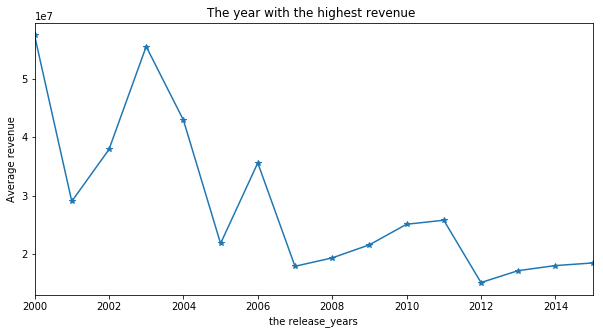

In [16]:
x = df.groupby('release_year').revenue.mean()
xlabel = 'the release_years'
ylabel = 'Average revenue'
title = "The year with the highest revenue "
plot_bar_by(x, xlabel, ylabel, title)

* 2000 had the highest average revenue
* the plot also decrease in revenue

In [17]:
def plot_stacked_bar(x, xlabel, ylabel, title):
    """A function to draw a stacked bar chart plot"""
    x.plot( figsize = [10,5])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    plt.show()

we created a function plot_stacked_bar(x, xlabel, ylabel, title) that enables us to plot bar chart in order to avoid repetitive codes

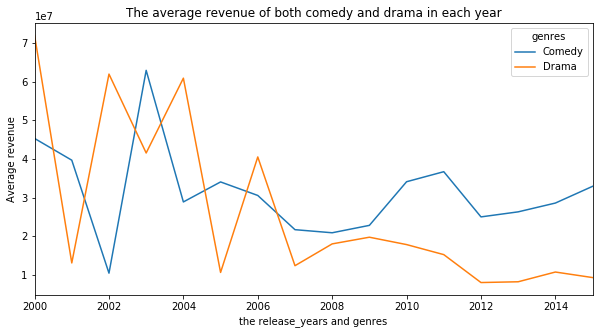

In [18]:
x =df.groupby(["release_year","genres"]).revenue.mean().unstack()
xlabel = 'the release_years and genres'
ylabel = 'Average revenue'
title = "The average revenue of both comedy and drama in each year"
plot_stacked_bar(x, xlabel, ylabel, title)

* In 2000 drama movies had the highest average revenue

### Research Question 2  ( the genre with the highest budget in the year 2010 between the genres comedy and drama.)

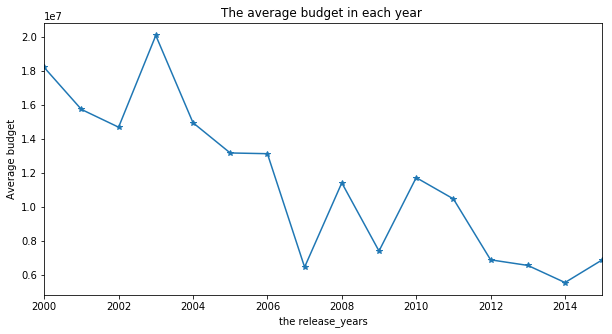

In [19]:
x = df.groupby('release_year').budget.mean()
xlabel = 'the release_years'
ylabel = 'Average budget'
title = "The average budget in each year "
plot_bar_by(x, xlabel, ylabel, title)

* 2003 had the highest average budget
* the plot also decrease in budget

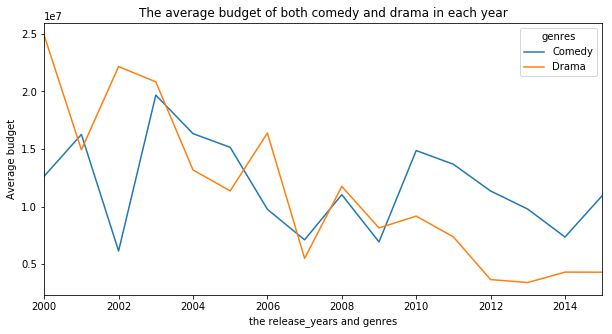

In [20]:
x =df.groupby(["release_year","genres"]).budget.mean().unstack()
xlabel = 'the release_years and genres'
ylabel = 'Average budget'
title = "The average budget of both comedy and drama in each year"
plot_stacked_bar(x, xlabel, ylabel, title)

*In 2010 comdey movies had the hightest budget

<a id='conclusions'></a>
## Conclusions
  In the data visualization exploration that we have created we could see that for our first research question it shows that the year 2000 had the highest revenue of about 60000000 and the drama movies in that year 2000 had the highest average revenue of about 70000000 compared to drama,
aslo the revenue decreases over the years   
  Secondly, for the second research question in the year 2010 between the genres comedy and drama, comedy had the heighest budget of about 1500000. Also the year 2003 had the highest budget of about 20000000 and the budget decrease over the years
    Lastly, their were limitation in our analysis because, The important variables in the dataset which are budget and revenue includes 0.0 values until the 50% percentile this means half of the data in these columns are 0.0. this might be as a result of missing data and 0.0 was used to input it.
    therefore can not be used to generalised the whole data set

## Submitting your Project 

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0